In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load data
data = pd.read_csv("Credit_Score_Accuracy_Data.csv")

# Handle missing values
data.fillna(0, inplace=True)

# Convert 'Missed_Payments' to binary 
data['Missed_Payments_Category'] = np.where(data['Missed_Payments'] == "On Time", 0, 1)

# Generate dummy variables for categorical columns
features = pd.get_dummies(data.drop(['Missed_Payments', 'Missed_Payments_Category'], axis=1), drop_first=True)
target = data['Missed_Payments_Category']

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.20, random_state=40)


In [3]:
from sklearn.tree import DecisionTreeClassifier

# Initializing and training the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=40)
dt_model.fit(X_train, Y_train)

# Predicting on test set
Y_pred_dt = dt_model.predict(X_test)

# Evaluating the model
print('Classification Report for Decision Tree:\n', classification_report(Y_test, Y_pred_dt))
print('Mean Absolute Error for Decision Tree:', mean_absolute_error(Y_test, Y_pred_dt))
print('Root Mean Squared Error for Decision Tree:', np.sqrt(mean_squared_error(Y_test, Y_pred_dt)))
print('R-squared value for Decision Tree:', r2_score(Y_test, Y_pred_dt))



Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      9797
           1       0.76      0.76      0.76     10203

    accuracy                           0.76     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.76      0.76      0.76     20000

Mean Absolute Error for Decision Tree: 0.2435
Root Mean Squared Error for Decision Tree: 0.4934571916590131
R-squared value for Decision Tree: 0.02559845886891532


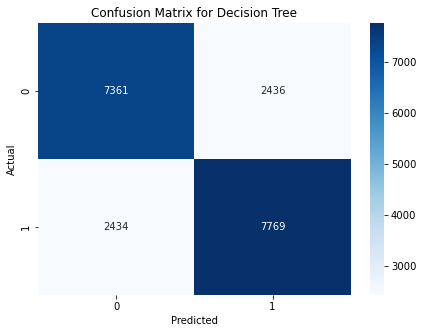

In [4]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm_dt = confusion_matrix(Y_test, Y_pred_dt)

# Visualizing the confusion matrix using seaborn
plt.figure(figsize=(7, 5))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


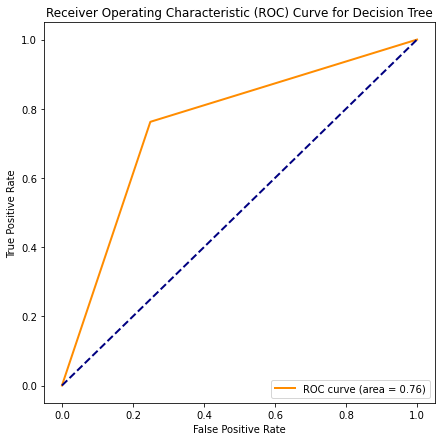

In [5]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
Y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC (Area Under Curve)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(Y_test, Y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curve
plt.figure(figsize=(7, 7))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()
